###**1. EDA**

####1. Read CVS file and store it's data.

In [345]:
import pandas as pd

data = pd.read_csv('diabetes.csv')

In [346]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [347]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


####2.  Print the shape of the dataset.

In [348]:
data.shape

(768, 9)

####3.  Get count of data.

In [349]:
data.count()

,0
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
Outcome,768


####4.  Get datatypes of objects in our dataset.

In [350]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


####6.  Get summary statistics of dataset

In [351]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


####6.  Check for missing values.

In [352]:
has_nan = data.isna().any()
has_nan

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


####7.  Check if any duplicated rows exists.

In [353]:
data.duplicated()
data.duplicated().sum()

0

####8.  Check distribution of outcome.

In [354]:
class_counts = data['Outcome'].value_counts()
class_counts

,count
Outcome,
0,500
1,268


####9. Create density plot for each feature and see feature distribution.

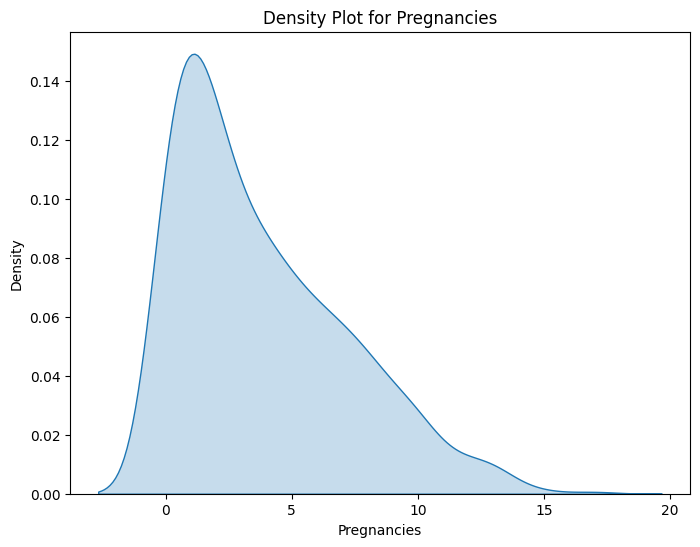

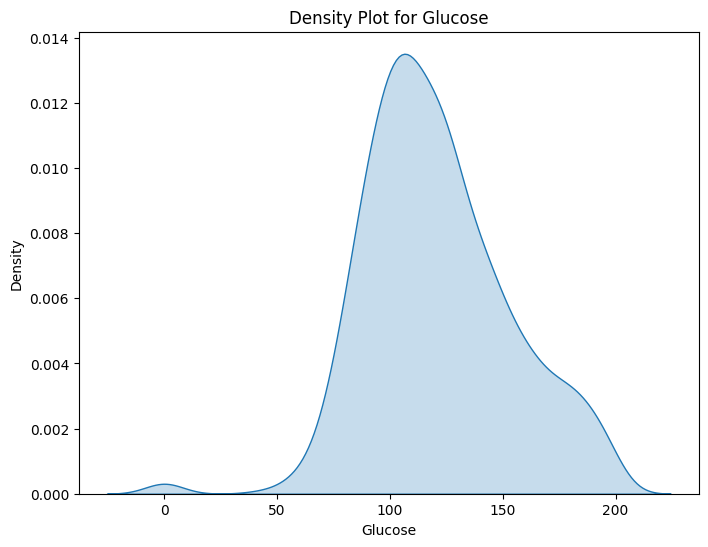

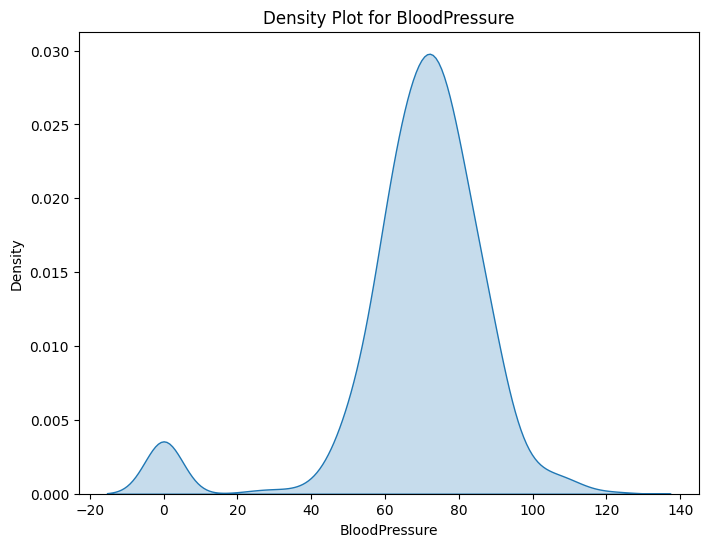

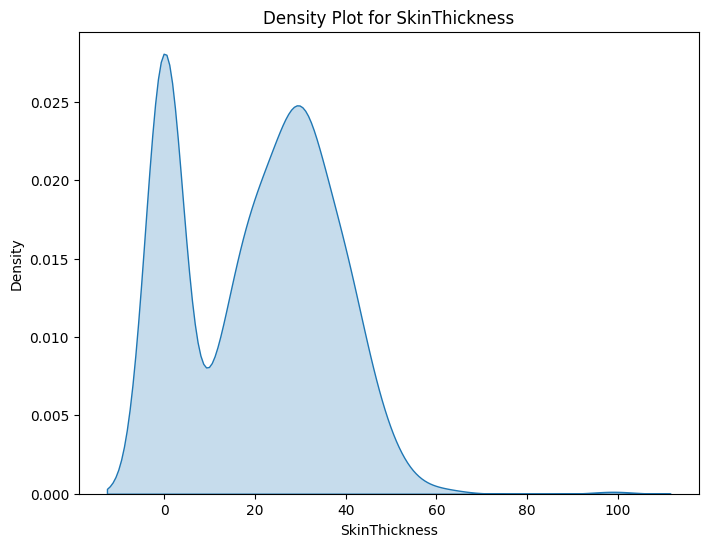

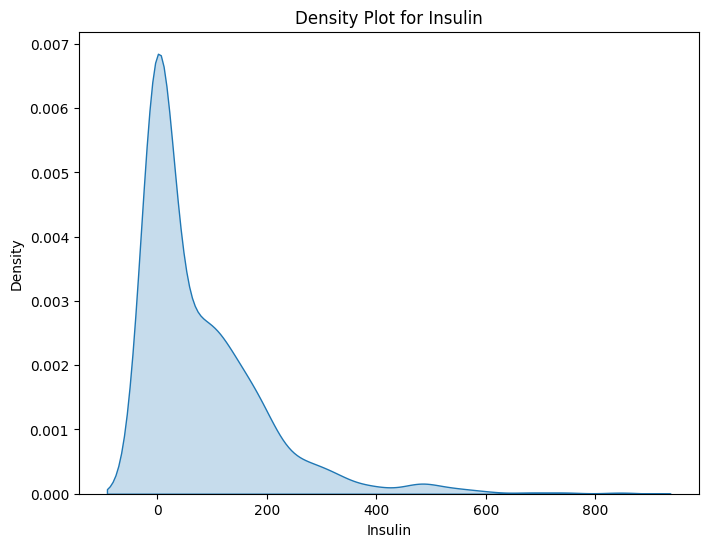

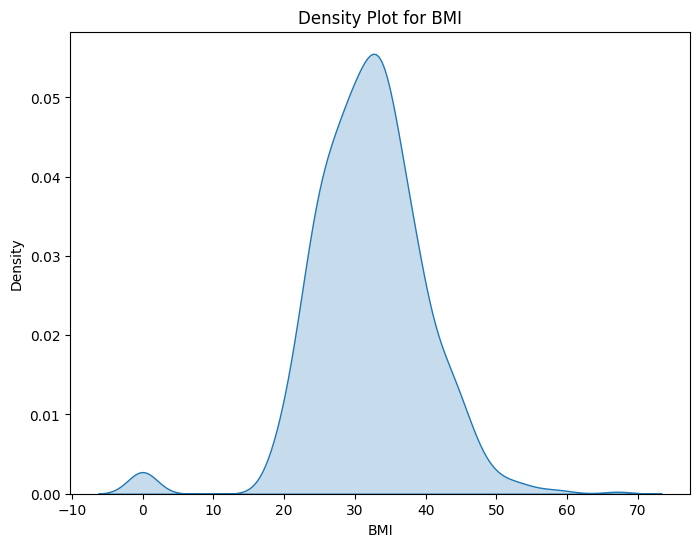

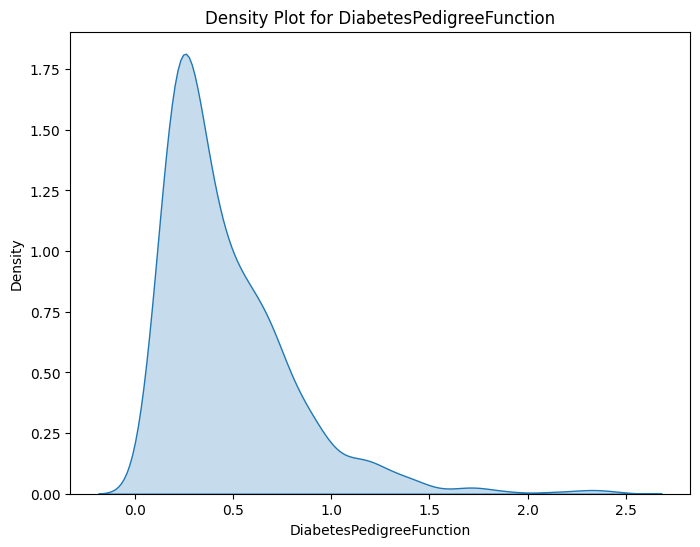

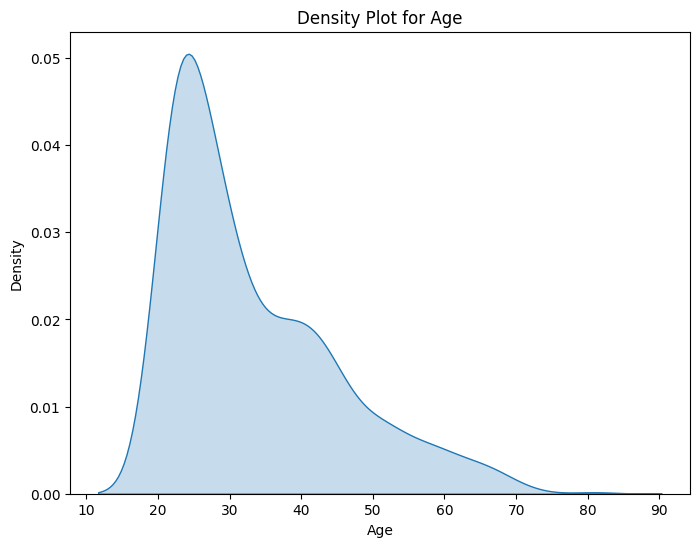

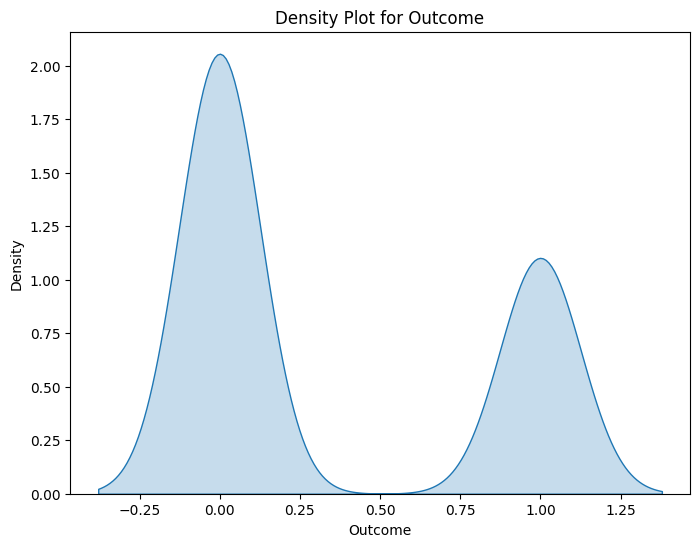

In [355]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in data.columns:
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data[feature], fill=True)
  plt.title(f"Density Plot for {feature}")
  plt.xlabel(feature)
  plt.ylabel("Density")
  print('\n')
  plt.show()

####10. Create box plot for each feature and see outliers.

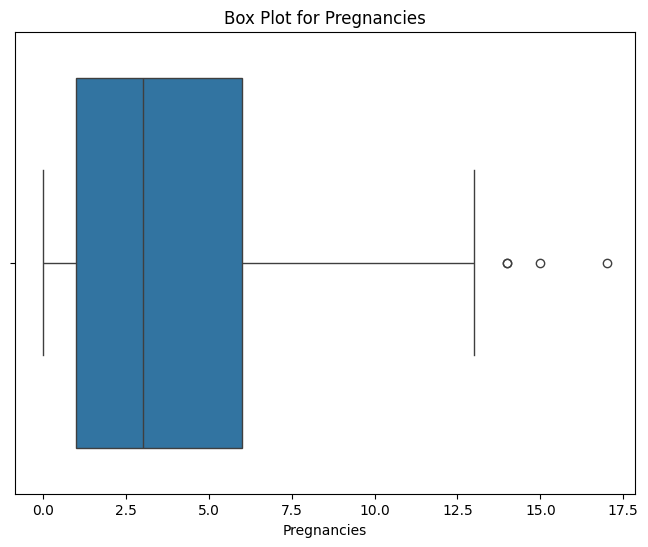

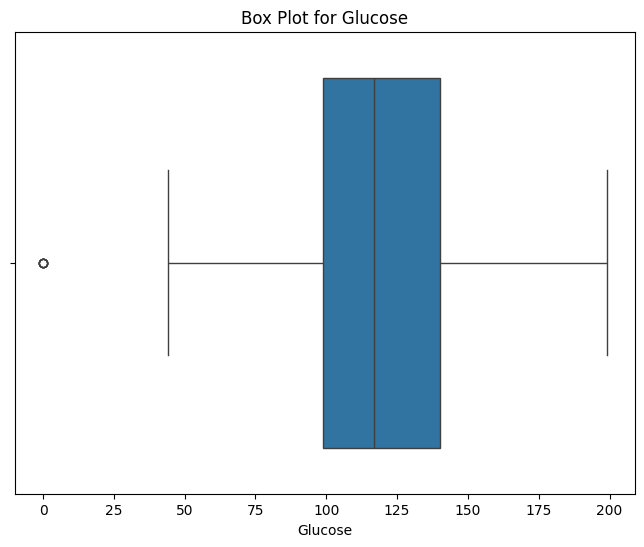

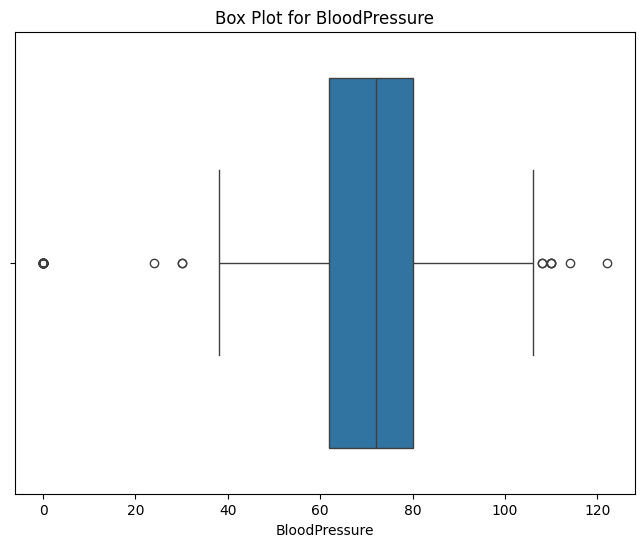

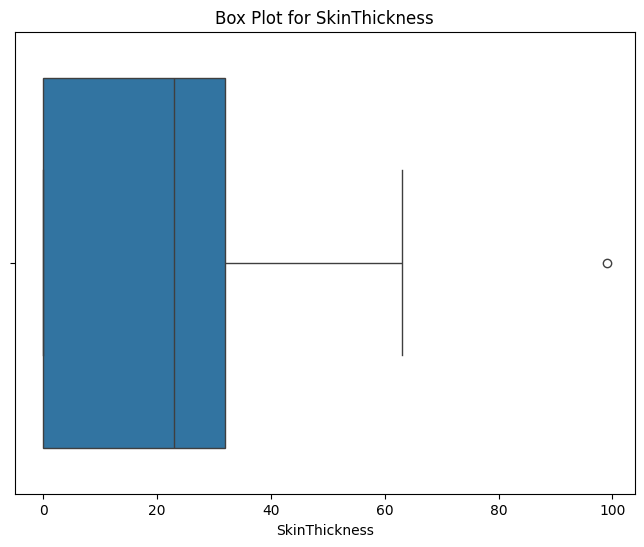

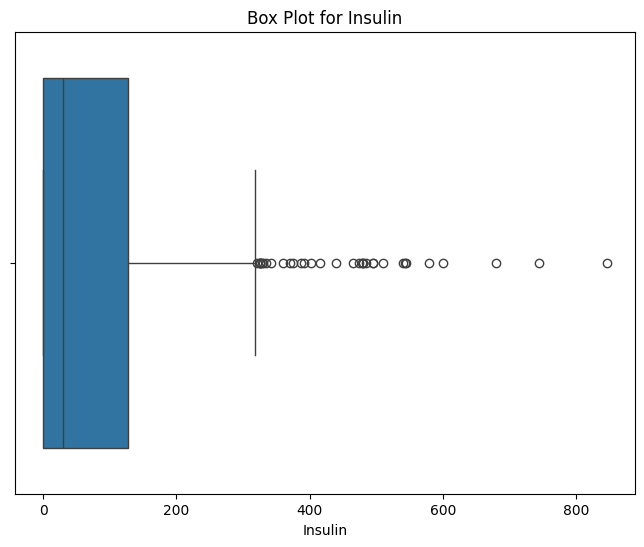

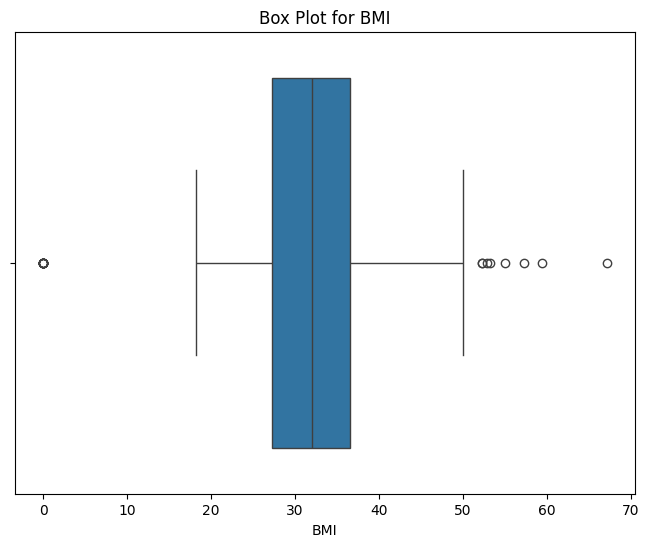

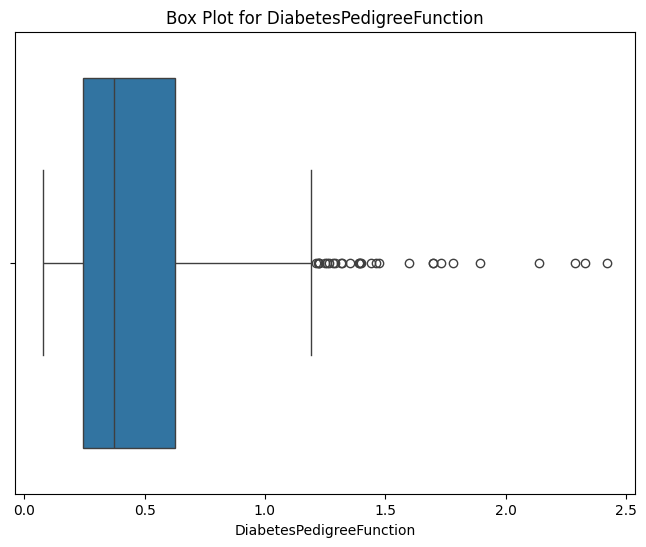

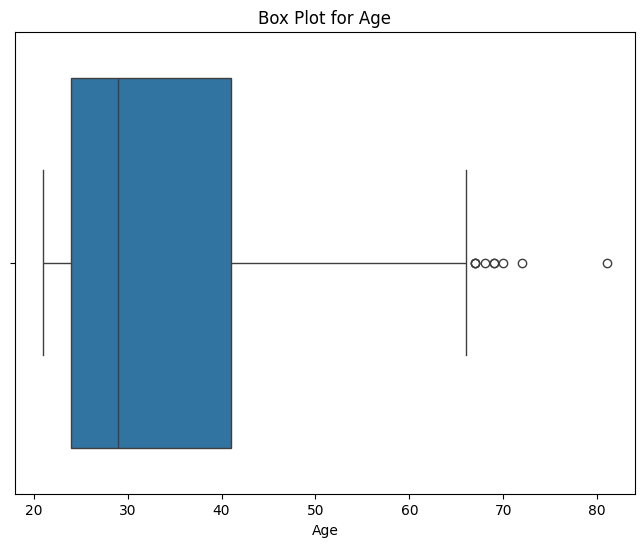

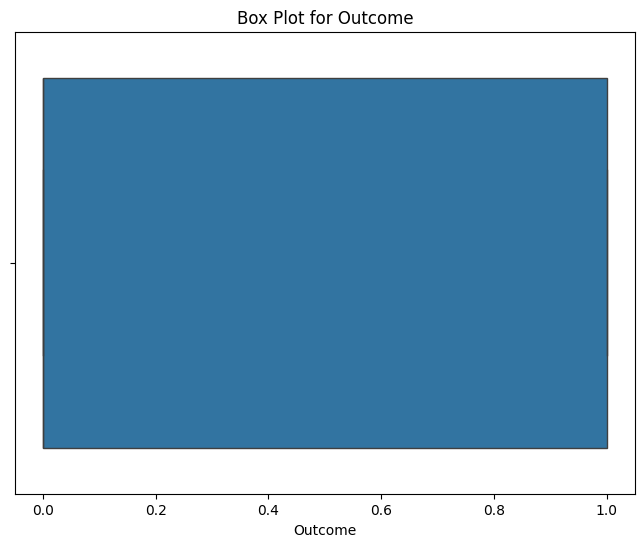

In [356]:
for feature in data.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[feature])
  plt.title(f"Box Plot for {feature}")
  plt.xlabel(feature)
  print('\n')
  plt.show()

####11. Create correlation matrix for data.

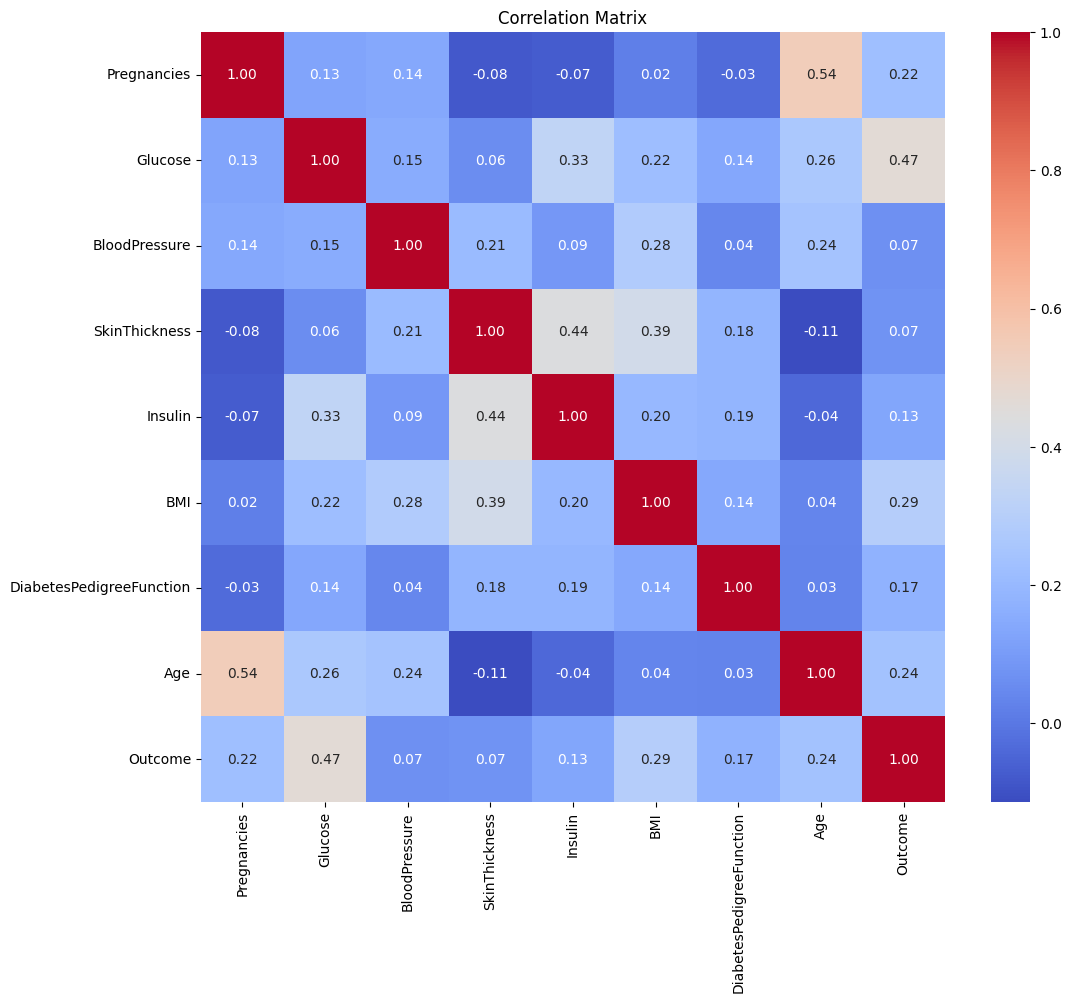

In [357]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

####12. Create scatter plot for features.

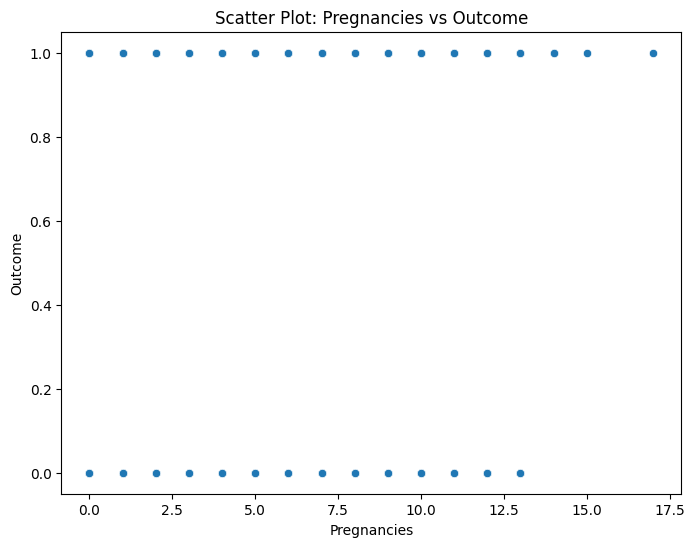

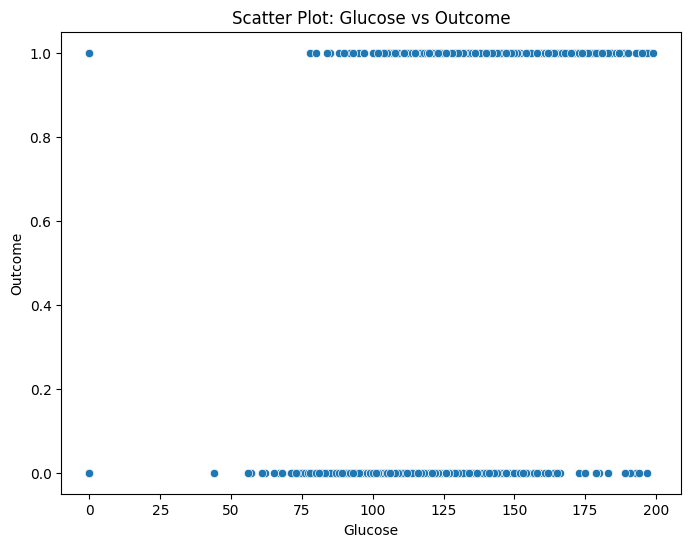

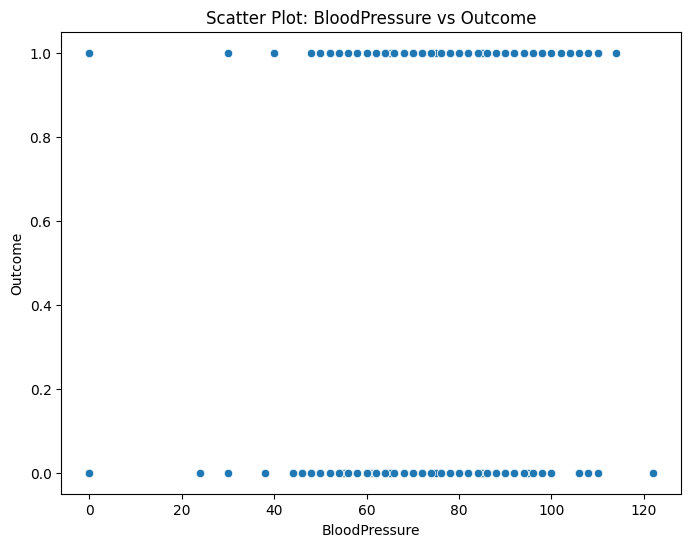

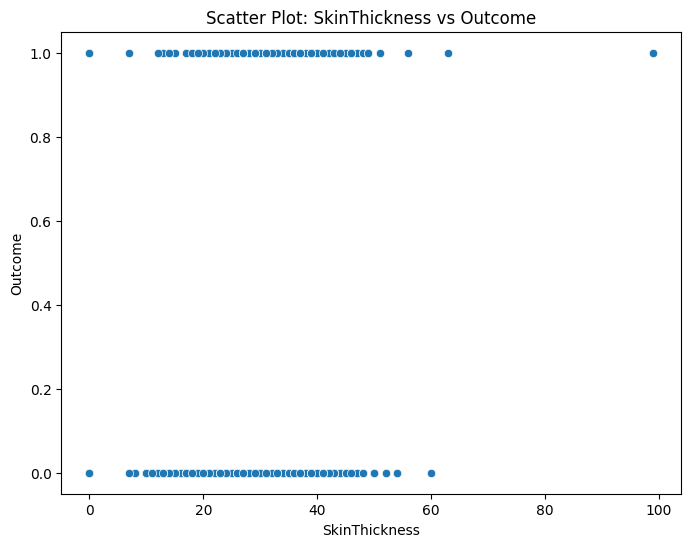

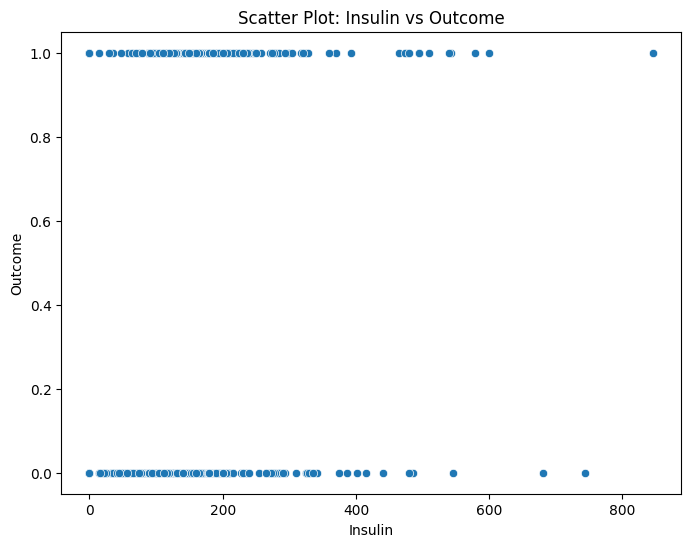

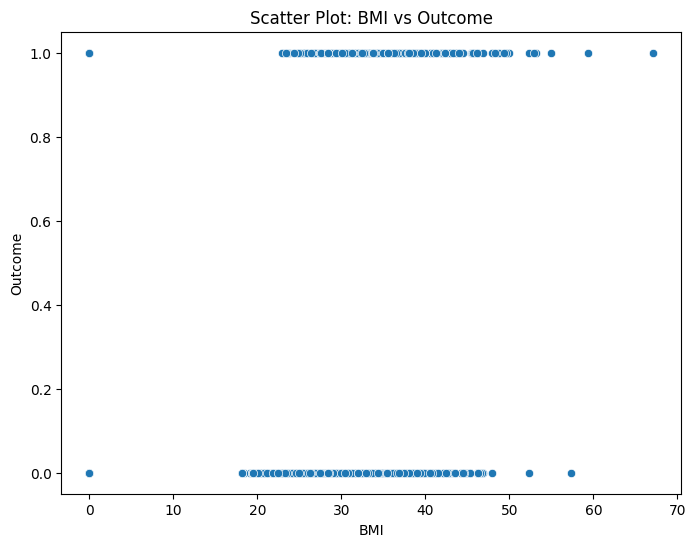

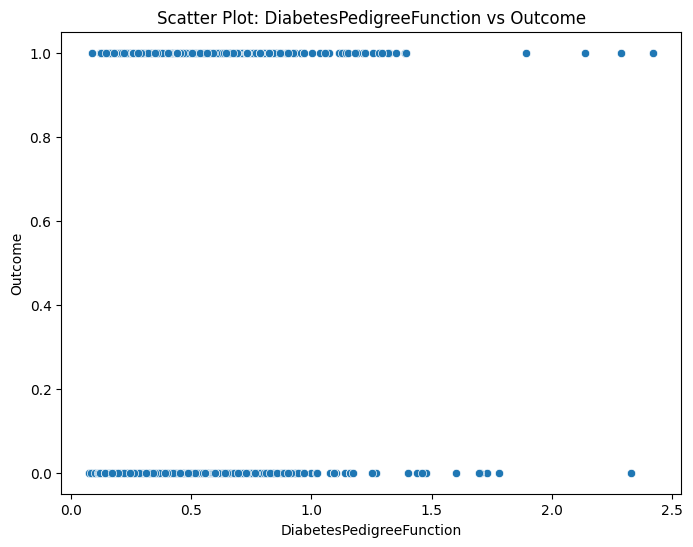

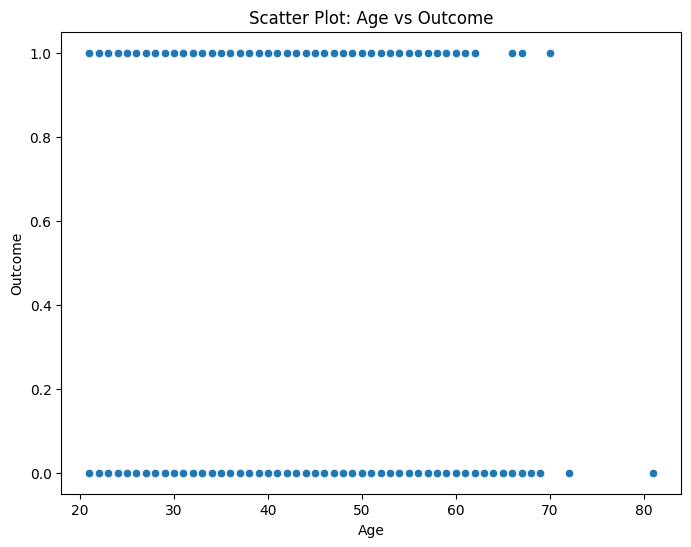

In [358]:
for feature in data.columns[:-1]:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=data[feature], y=data['Outcome'])
  plt.title(f"Scatter Plot: {feature} vs Outcome")
  plt.xlabel(feature)
  plt.ylabel("Outcome")
  print('\n')
  plt.show()

###**2. Preprocessing**

####1.  Data Cleaning: As we checked in previous step, no missing values exists in our dataset, so we don't need to handle them. but we can see 0 values in Insulin, SkinThickness and BloodPreasure, which indicates there is no information for them and we have to handle this missing data,

In [359]:
means = data.mean()
data = data.apply(lambda x: x.replace(0, x.mean()) if x.name in data.columns and x.name!='Outcome' else x)

In [360]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [361]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1.0,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


####2.  Handling categorial variables: Additionaly, no categorial values exist there. So there is no need for label encoding or one-hot encoding.

####3.  Outlier detection and handling: But as we saw in boxplots, outlier data exists in he dataset. so we should remove them.

In [362]:
def remove_outliers_iqr(data, feature):
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_filtered = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
  return data_filtered

for feature in data.columns:
  if feature != 'Outcome':
    data = remove_outliers_iqr(data, feature)

data.shape

(599, 9)

####4.  Data formatting: As types of our data in the datset is numerical for all features and no object type exists, there is no need for data formatting.


####5.  As we checked, there is no duplicate rows in our dataset, so we don't need to remove them.

###**3.  Classification (before Normalization)**

####1.  Save features data in X matrix and Outcome data in Y matrix

In [363]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

####2.  Split data such that 80% belongs to train data and 20% belongs to test data.

In [364]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

####3.  Implement Logistic regression on both datasets.

As we see, logistic regression fails to converge here, which means that  the iterative optimization proces has not successfully found the optimal values for the model’s parameters.

It probably happened because variables in our problem have vastly different scales and we have not done standardization and normalization yet.

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####4.  Calculate accuracy.

In [366]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.775


####5.  Calculate precision.

In [367]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_pred)
print(f"Precision: {precision}")

Precision: 0.7692307692307693


####7.  Calculate confusion matrix.

73 instances where the actual class was 0, and the model correctly predicted 0.

6 instances where the actual class was 0, but the model incorrectly predicted 1.

 21 instances where the actual class was 1, but the model incorrectly predicted 0.

 20 instances where the actual class was 1, and the model correctly predicted 1.

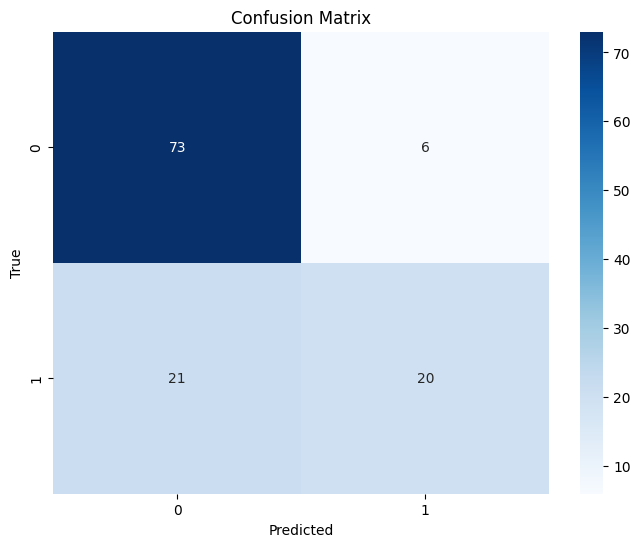

In [316]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###**4. Standardize the data.**

We used StandardScaler method for it.

In [317]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)

X_test_standardized = scaler.transform(X_test)

###**5. Repeat classification with standardized data.**

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_standardized, Y_train)

Y_pred = model.predict(X_test_standardized)

In [319]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.775


In [320]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_pred)
print(f"Precision: {precision}")

Precision: 0.7692307692307693


73 instances where the actual class was 0, and the model correctly predicted 0.

6 instances where the actual class was 0, but the model incorrectly predicted 1.

21 instances where the actual class was 1, but the model incorrectly predicted 0.

20 instances where the actual class was 1, and the model correctly predicted 1.

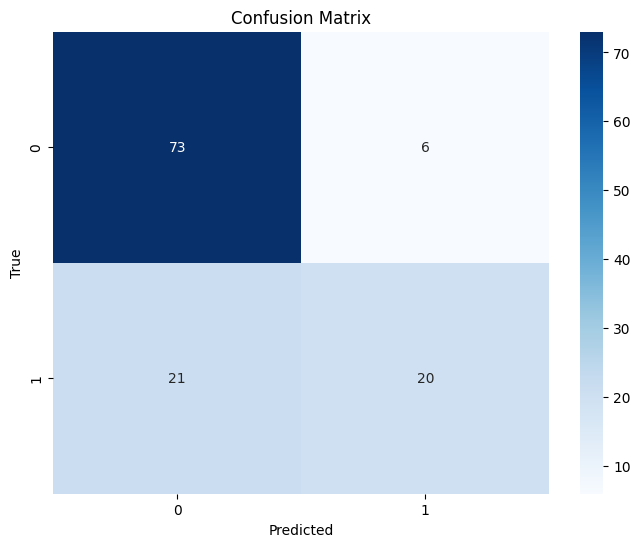

In [321]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###**6. Normalize the data.**

In [322]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)

###**7. Repeat classification with normalized data.**

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_normalized, Y_train)

Y_pred = model.predict(X_test_normalized)

In [324]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7916666666666666


In [325]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_pred)
print(f"Precision: {precision}")

Precision: 0.8333333333333334


75 instances where the actual class was 0, and the model correctly predicted 0.

4 instances where the actual class was 0, but the model incorrectly predicted 1.

21 instances where the actual class was 1, but the model incorrectly predicted 0.

20 instances where the actual class was 1, and the model correctly predicted 1.

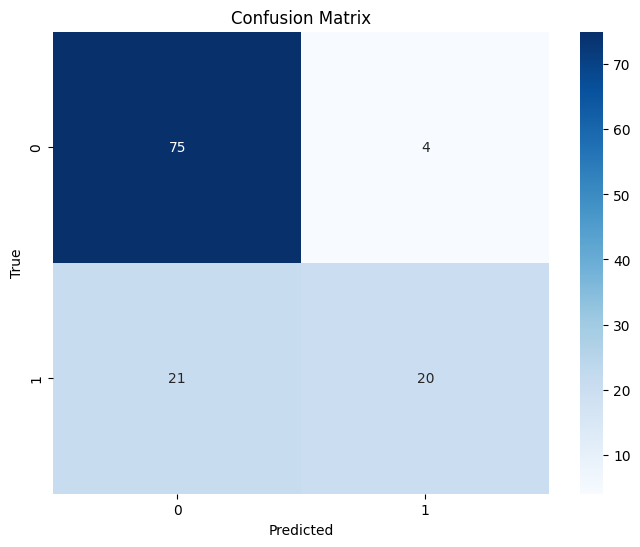

In [326]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

As we saw, standardizing data did not change precision and recall (probably because of preprocessing steps), but normalizing improve them a lot.